<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [2]:
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"
filename = "survey-data.sqlite"
urllib.request.urlretrieve(url, filename)

('survey-data.sqlite', <http.client.HTTPMessage at 0x11d189cefd0>)

#### Install the required libraries and import them


In [3]:
!pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [6]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


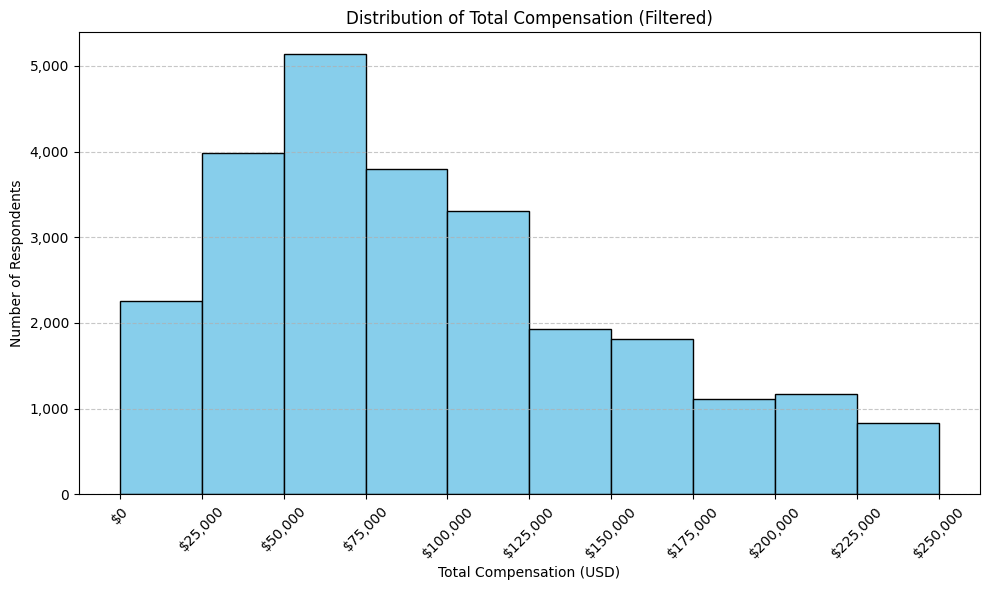

In [13]:
import matplotlib.ticker as mticker

plt.figure(figsize=(10,6))
plt.hist(comp_values_clean, bins=range(0, 250_001, 25000), color='skyblue', edgecolor='black')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Total Compensation (Filtered)')
plt.xticks(range(0, 250_001, 25000), [f'${x:,}' for x in range(0, 250_001, 25000)], rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


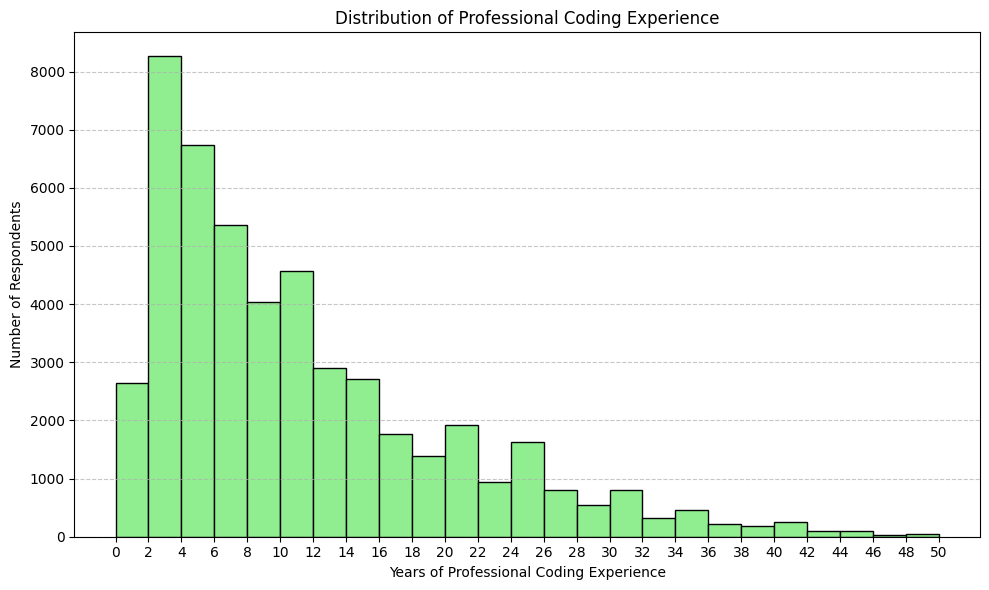

In [14]:
## Write your code here
# Query YearsCodePro from the main table
QUERY = "SELECT YearsCodePro FROM main"
df_years = pd.read_sql_query(QUERY, conn)

# Clean the data: convert to numeric, drop missing/invalid values
years_values = pd.to_numeric(df_years['YearsCodePro'], errors='coerce').dropna()
years_values = years_values[(years_values >= 0) & (years_values <= 50)]  # Filter for reasonable experience

# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(years_values, bins=range(0, 51, 2), color='lightgreen', edgecolor='black')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Professional Coding Experience')
plt.xticks(range(0, 51, 2))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [17]:
print(df_age_comp['Age'].unique())

['25-34 years old' '35-44 years old' '45-54 years old' '55-64 years old'
 '18-24 years old' '65 years or older' 'Under 18 years old'
 'Prefer not to say']


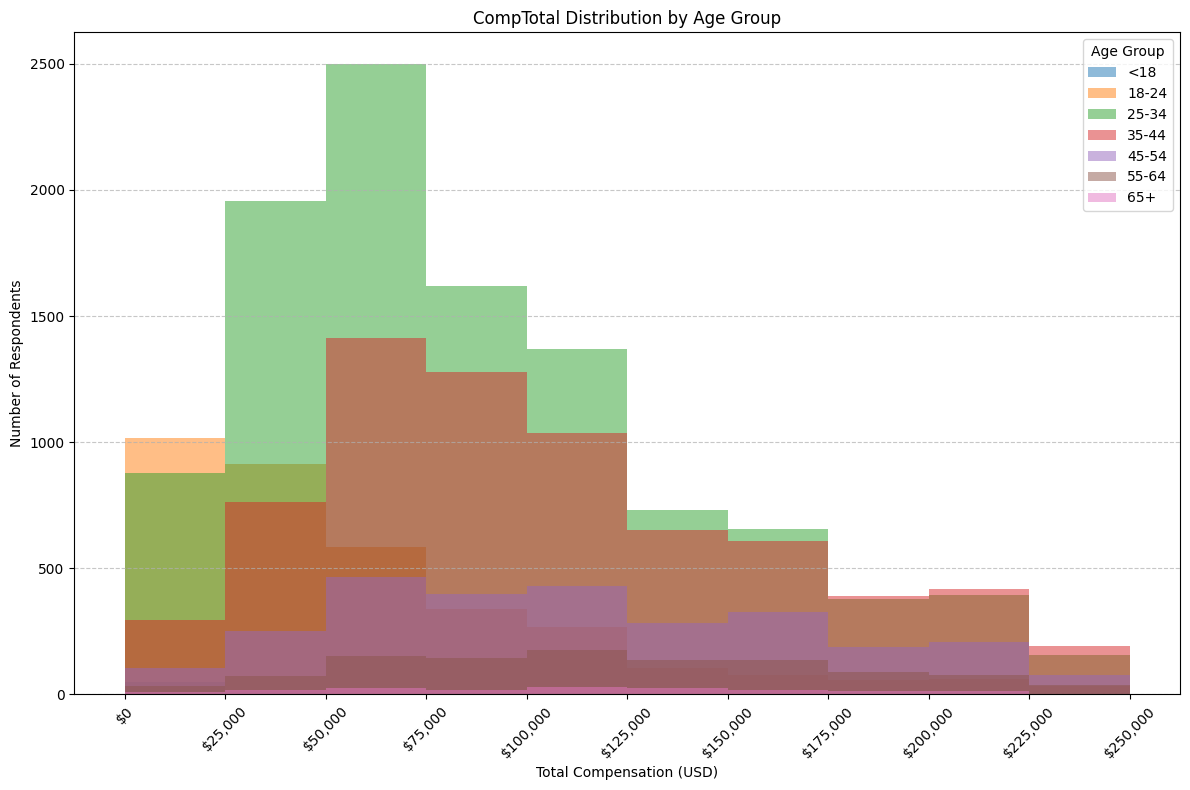

In [18]:
# Map Age strings to age group labels
def map_age_group(age_str):
    if 'Under 18' in age_str:
        return '<18'
    elif '18-24' in age_str:
        return '18-24'
    elif '25-34' in age_str:
        return '25-34'
    elif '35-44' in age_str:
        return '35-44'
    elif '45-54' in age_str:
        return '45-54'
    elif '55-64' in age_str:
        return '55-64'
    elif '65' in age_str:
        return '65+'
    else:
        return 'Other'

df_age_comp['AgeGroup'] = df_age_comp['Age'].apply(map_age_group)

# Filter out 'Other' and missing values
df_age_comp = df_age_comp[df_age_comp['AgeGroup'] != 'Other']

# Plot histograms for each age group
age_groups = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
plt.figure(figsize=(12,8))
for group in age_groups:
    group_data = df_age_comp[df_age_comp['AgeGroup'] == group]['CompTotal']
    plt.hist(group_data, bins=range(0, 250_001, 25000), alpha=0.5, label=group)

plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.title('CompTotal Distribution by Age Group')
plt.legend(title='Age Group')
plt.xticks(range(0, 250_001, 25000), [f'${x:,}' for x in range(0, 250_001, 25000)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [29]:
# Check raw TimeSearching values from the database before any cleaning
QUERY = "SELECT TimeSearching FROM main"
df_raw_time = pd.read_sql_query(QUERY, conn)

print(df_raw_time.head(20))
print(df_raw_time['TimeSearching'].unique())
print(df_raw_time['TimeSearching'].value_counts(dropna=False))

           TimeSearching
0                   None
1                   None
2                   None
3                   None
4                   None
5                   None
6                   None
7                   None
8                   None
9                   None
10   30-60 minutes a day
11                  None
12   30-60 minutes a day
13                  None
14                  None
15  60-120 minutes a day
16                  None
17                  None
18   15-30 minutes a day
19                  None
[None '30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']
TimeSearching
None                          36526
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64


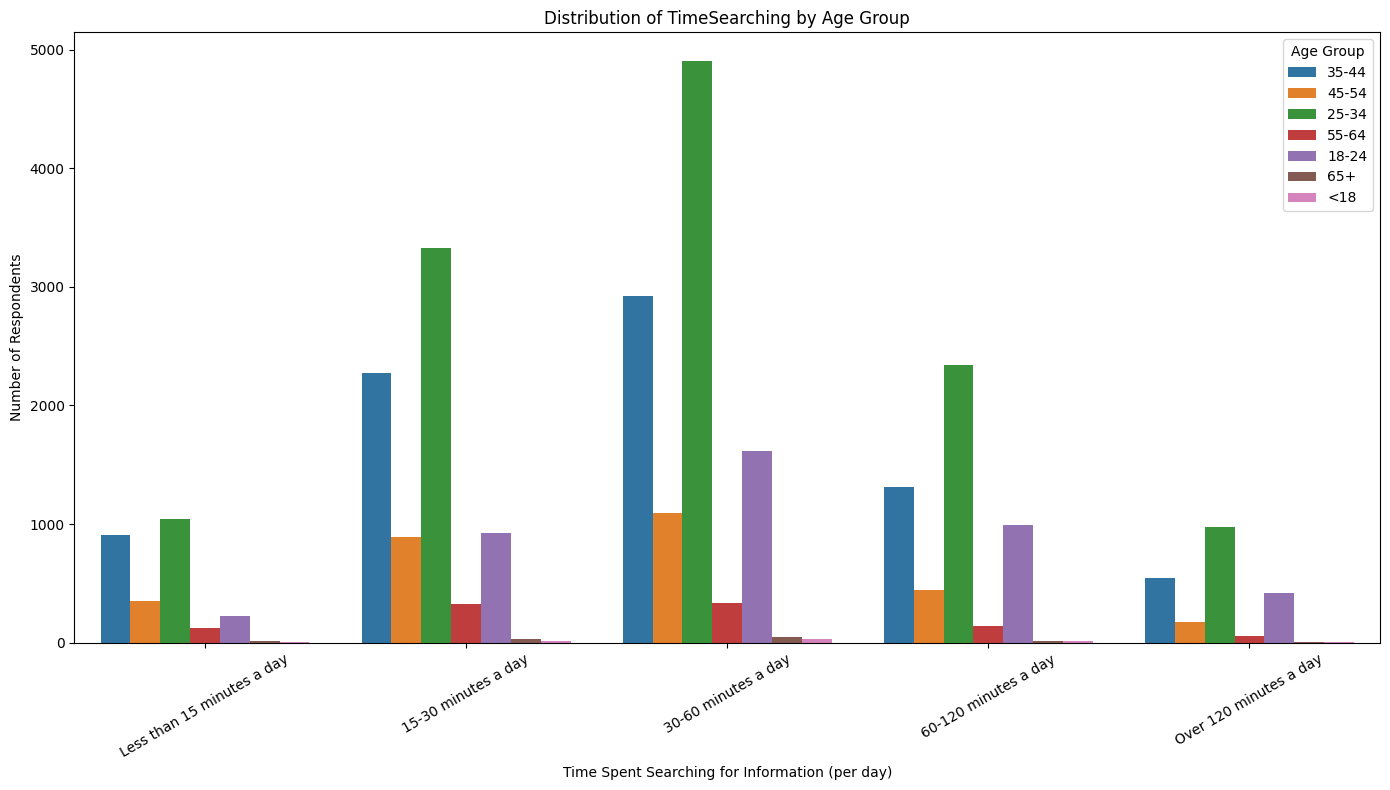

In [31]:
# Query Age and TimeSearching from the main table
QUERY = "SELECT Age, TimeSearching FROM main"
df_time = pd.read_sql_query(QUERY, conn)

# Map Age strings to age group labels
def map_age_group(age_str):
    if pd.isnull(age_str):
        return 'Other'
    if 'Under 18' in age_str:
        return '<18'
    elif '18-24' in age_str:
        return '18-24'
    elif '25-34' in age_str:
        return '25-34'
    elif '35-44' in age_str:
        return '35-44'
    elif '45-54' in age_str:
        return '45-54'
    elif '55-64' in age_str:
        return '55-64'
    elif '65' in age_str:
        return '65+'
    else:
        return 'Other'

df_time['AgeGroup'] = df_time['Age'].apply(map_age_group)
df_time = df_time[df_time['AgeGroup'] != 'Other']

# Filter out missing TimeSearching values
df_time = df_time[df_time['TimeSearching'].notnull() & (df_time['TimeSearching'] != 'None')]

# Plot bar chart of TimeSearching categories by age group
import seaborn as sns

plt.figure(figsize=(14,8))
sns.countplot(data=df_time, x='TimeSearching', hue='AgeGroup', order=[
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
])
plt.xlabel('Time Spent Searching for Information (per day)')
plt.ylabel('Number of Respondents')
plt.title('Distribution of TimeSearching by Age Group')
plt.legend(title='Age Group')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PostgreSQL'),
  Text(1, 0, 'SQLite'),
  Text(2, 0, 'MySQL'),
  Text(3, 0, 'MongoDB'),
  Text(4, 0, 'Redis')])

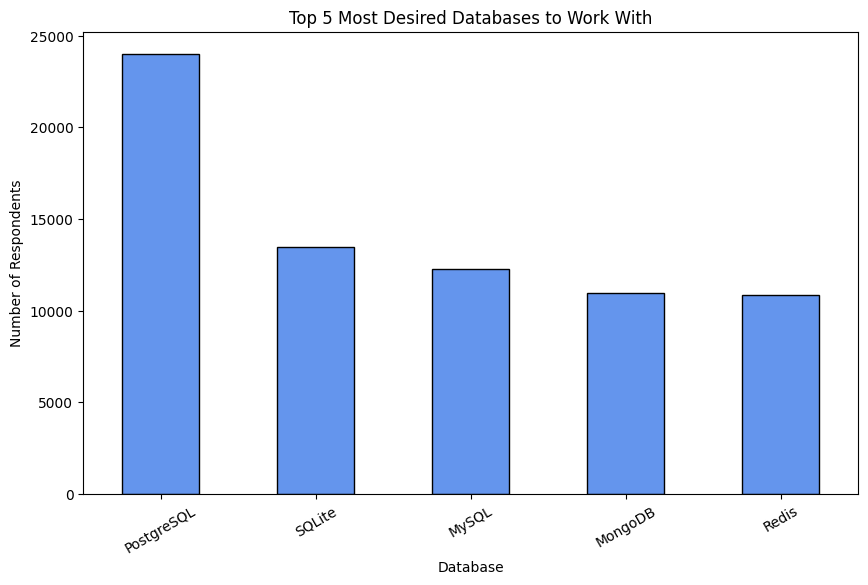

In [32]:
# Query DatabaseWantToWorkWith from the main table
QUERY = "SELECT DatabaseWantToWorkWith FROM main"
df_db = pd.read_sql_query(QUERY, conn)

# Split multiple databases in each row and count occurrences
db_series = df_db['DatabaseWantToWorkWith'].dropna().str.split(';')
db_flat = [db.strip() for sublist in db_series for db in sublist if db.strip()]
db_counts = pd.Series(db_flat).value_counts().head(5)

# Plot histogram (bar chart) of top 5 most desired databases
plt.figure(figsize=(10,6))
db_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Most Desired Databases to Work With')
plt.xticks(rotation=30)

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


(array([0, 1, 2]),
 [Text(0, 0, 'Hybrid (some remote, some in-person)'),
  Text(1, 0, 'Remote'),
  Text(2, 0, 'In-person')])

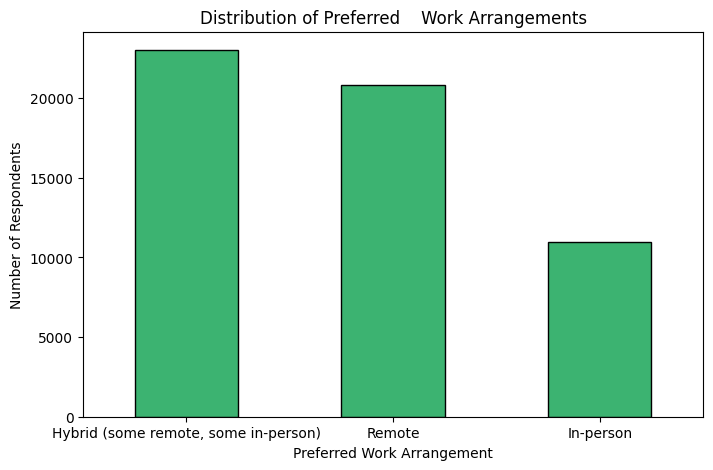

In [34]:
## Write your code here
# Query RemoteWork from the main table
QUERY = "SELECT RemoteWork FROM main"
df_remote = pd.read_sql_query(QUERY, conn)

# Count occurrences of each work arrangement
remote_counts = df_remote['RemoteWork'].value_counts()

# Plot histogram (bar chart) of preferred work locations
plt.figure(figsize=(8,5))
remote_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.xlabel('Preferred Work Arrangement')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Preferred    Work Arrangements')
plt.xticks(rotation=0)      

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


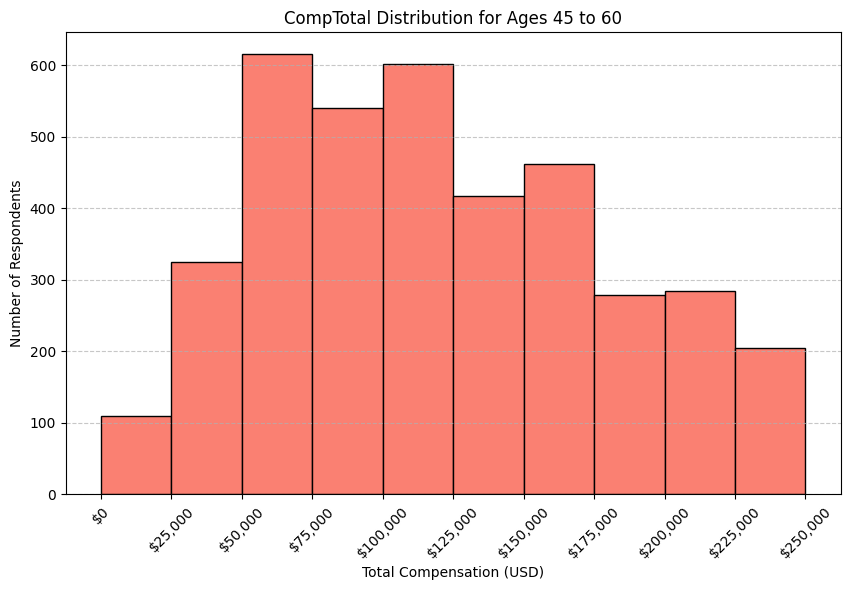

In [35]:
## Write your code here
# Query Age and CompTotal from the main table
QUERY = "SELECT Age, CompTotal FROM main"
df_comp = pd.read_sql_query(QUERY, conn)

# Map Age strings to age group labels
def map_age_group(age_str):
    if pd.isnull(age_str):
        return 'Other'
    if '45-54' in age_str:
        return '45-54'
    elif '55-64' in age_str:
        return '55-64'
    else:
        return 'Other'

df_comp['AgeGroup'] = df_comp['Age'].apply(map_age_group)
df_comp = df_comp[df_comp['AgeGroup'] != 'Other']

# Clean CompTotal data
df_comp['CompTotal'] = pd.to_numeric(df_comp['CompTotal'], errors='coerce')
df_comp = df_comp.dropna(subset=['CompTotal'])
df_comp = df_comp[(df_comp['CompTotal'] > 0) & (df_comp['CompTotal'] <= 250000)]

# Plot histogram for ages 45 to 60
plt.figure(figsize=(10,6))
plt.hist(df_comp['CompTotal'], bins=range(0, 250_001, 25000), color='salmon', edgecolor='black')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.title('CompTotal Distribution for Ages 45 to 60')
plt.xticks(range(0, 250_001, 25000), [f'${x:,}' for x in range(0, 250_001, 25000)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [37]:
print(df_jobsat.head())

    YearsCodePro  JobSat ExperienceGroup
12          12.0     8.0           11-20
15          27.0     5.0             21+
18          10.0    10.0            6-10
22          18.0     9.0           11-20
24          15.0     4.0           11-20


In [38]:
print(df_jobsat['JobSat'].unique()) and print(df_jobsat['ExperienceGroup'].unique())

[ 8.  5. 10.  9.  4.  7.  6.  3.  2.  1.  0.]


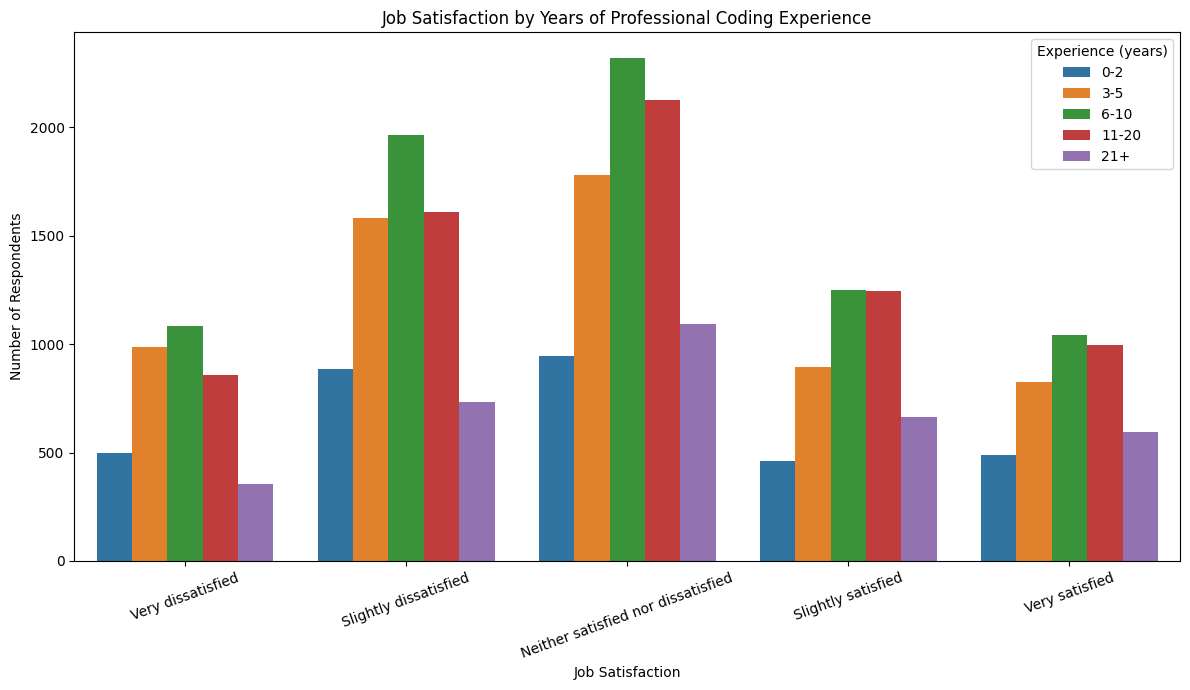

In [40]:
## Write your code here
# Map numeric JobSat to categorical labels
jobsat_map = {
    1: 'Very dissatisfied',
    2: 'Slightly dissatisfied',
    3: 'Neither satisfied nor dissatisfied',
    4: 'Slightly satisfied',
    5: 'Very satisfied',
    6: 'Very dissatisfied',
    7: 'Slightly dissatisfied',
    8: 'Neither satisfied nor dissatisfied',
    9: 'Slightly satisfied',
    10: 'Very satisfied'
}
df_jobsat['JobSatCat'] = df_jobsat['JobSat'].map(jobsat_map)

# Plot using the new categorical column
plt.figure(figsize=(12,7))
sns.countplot(data=df_jobsat, x='JobSatCat', hue='ExperienceGroup', order=[
    'Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied',
    'Slightly satisfied', 'Very satisfied'
])
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.legend(title='Experience (years)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [41]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
